# Import

In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
!pip install hmmlearn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import MaxAbsScaler
# import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import hmmlearn.hmm
# from sklearn_crfsuite import CRF

In [3]:
## Options
pd.set_option("max_colwidth", None)

In [4]:
# Get the absolute path to the 'src' directory
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
sys.path.append(project_root)
print(project_root)

c:\Users\DELL\Downloads\BTL_ML\ML_LHPD2


In [5]:
from src.features.build_features_utils import *  # Assuming build_features_utils is inside build_features.py
from src.models.models_utils import *  # Assuming utils.py exists inside src/models/

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Dict

In [6]:
# Dictionary for models
MODEL_DICT = {
    "decision_tree": DecisionTreeClassifier,
    "perceptron": Perceptron,
    "bayesian": GaussianNB,
    "bayesian_enhanced": lambda: GaussianNB(var_smoothing=1e-9),
    "random_forest": RandomForestClassifier,
    "xgboost": xgb.XGBClassifier,
    "svm": SVC,
    "max_edge_classifier": MaxAbsScaler,
    "kernel_functions_svm": lambda: SVC(kernel='rbf'),
    "soft_margin_svm": lambda: SVC(C=1.0),
    # "lda": LDA,
    "logistic_regression": LogisticRegression,
    "hmm": lambda: hmmlearn.hmm.GaussianHMM(n_components=3),
    "crf": CRF,
}

# Dictionary for model parameters
MODEL_PARAMS = {
    "decision_tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [10, 20],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2],
        "max_features": ["sqrt", "log2"]
    },
    
    # "decision_tree": {
    #     "criterion": ["gini", "entropy"],
    #     "max_depth": [10, 20, 30, 40],
    #     "min_samples_split": [2, 5, 10],
    #     "min_samples_leaf": [1, 2, 4],
    #     "max_features": ["auto", "sqrt", "log2"]
    # },
    
    "perceptron": {
        "max_iter": [1000, 2000],
        "tol": [1e-3],
        "eta0": [0.001],
        "penalty": ["l2"],
        "alpha": [0.0001, 0.001]
    },
    
    # "perceptron": {
    #     "max_iter": [1000, 2000],
    #     "tol": [1e-3, 1e-4],
    #     "eta0": [0.001, 0.01, 0.1],
    #     "penalty": [None, "l2", "l1"],
    #     "alpha": [0.0001, 0.001, 0.01]
    # },
    
    # "bayesian": {
    #     "priors": [None, "uniform", "gaussian"],
    #     "var_smoothing": [1e-9, 1e-8, 1e-7]
    # },
    
    "bayesian_enhanced": {
        "var_smoothing": [1e-9]
    },
    
    # "bayesian_enhanced": {
    #     "var_smoothing": [1e-9, 1e-8, 1e-7]
    # },
    
    "random_forest": {
        "n_estimators": [100],
        "max_depth": [10],
        "min_samples_split": [2],
        "min_samples_leaf": [1],
        "max_features": ["sqrt"]
    },
    
    # "random_forest": {
    #     "n_estimators": [50, 100, 200],
    #     "max_depth": [None, 10, 20, 30],
    #     "min_samples_split": [2, 5, 10],
    #     "min_samples_leaf": [1, 2, 4],
    #     "max_features": ["auto", "sqrt", "log2"],
    #     "bootstrap": [True, False]
    # },
    
    "xgboost": {
        "n_estimators": [100],
        "learning_rate": [0.01, 0.1],
        "max_depth": [6, 10]
    },
    
    # "xgboost": {
    #     "n_estimators": [100, 200, 300],
    #     "learning_rate": [0.01, 0.1, 0.2],
    #     "max_depth": [3, 6, 10],
    #     "subsample": [0.8, 1.0],
    #     "colsample_bytree": [0.8, 1.0],
    #     "gamma": [0, 0.1, 0.2]
    # },
    
    "svm": {
        "kernel": ["linear"],
        "C": [0.1, 0.001]
    },
    
    # "svm": {
    #     "kernel": ["linear", "rbf", "poly"],
    #     "C": [0.1, 1, 10, 100],
    #     "gamma": [0.1, 0.01, "scale"],
    #     "degree": [2, 3, 4]
    # },
    
    "max_edge_classifier": {
        "scaler": ["maxabs", "standard"]
    },
    
    "kernel_functions_svm": {
        "kernel": ["rbf", "poly"],
        "C": [1.0, 10.0, 100.0],
        "gamma": ["scale", "auto"]
    },
    
    "soft_margin_svm": {
        "C": [0.1, 1.0, 10.0]
    },
    
    "lda": {
        "n_components": [2, 3, 4, 5],
        "solver": ["svd", "lsqr", "eigen"],
        "shrinkage": ["auto", None]
    },
    
    "logistic_regression": {
        "penalty": ["l2"],
        "C": [0.1, 1.0],
        "max_iter": [1000, 2000]
    },
    
    # "logistic_regression": {
    #     "penalty": ["l1", "l2", "elasticnet", None],
    #     "C": [0.1, 1.0, 10.0],
    #     "solver": ["liblinear", "lbfgs", "saga"],
    #     "max_iter": [1000, 2000]
    # },
    
    
    "hmm": {
        "n_components": [2, 3, 4],
        "covariance_type": ["diag", "full", "tied"],
        "n_iter": [100, 200],
        "init_params": ["c", "s", "cs"],
        "params": ["c", "t", "ct"]
    },
    
    "crf": {
        "algorithm": ["lbfgs", "newton-cg", "liblinear"],
        "max_iterations": [100, 200],
        "penalty": ["l2", "elasticnet"],
        "dual": [True, False],
        "tol": [1e-4, 1e-3],
    }
}

# Dictionary for dimensionality reduction methods
DIMENSIONALITY_REDUCTION_DICT = {
    "pca": PCA,
    "lda": LDA,
}

NameError: name 'xgb' is not defined

# Load dataset

In [8]:
# Load dataset
# dataset_path = os.path.join(project_root, "data", "final", "final_clean_no_neutral_no_duplicates.csv")
dataset_path = "C:\\Users\\DELL\\Downloads\\archive\\final_clean_no_neutral_no_duplicates.csv"
df = pd.read_csv(dataset_path)


In [9]:
df.head()

,target,text,text_clean,text_length,text_clean_length
0,0.0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",awww thats a bummer you shoulda got david carr of third day to do it d,19,16
1,0.0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,is upset that he cant update his facebook by texting it and might cry a a result school today also blah,21,21
2,0.0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,i dived many time for the ball managed to save the rest go out of bound,18,16
3,0.0,my whole body feels itchy and like its on fire,my whole body feel itchy and like it on fire,10,10
4,0.0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",no it not behaving at all im mad why am i here because i cant see you all over there,21,20


In [10]:
# Replace target 4 with 1
df["target"] = df["target"].replace(4, 1)


In [38]:
# # Sample exactly 1,000 random entries from the dataset
# df_sampled = df.sample(n=1000, random_state=42)

# # Split dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(
#     df_sampled["text_clean"], df_sampled["target"], test_size=0.2, random_state=42
# )

# # Print lengths of splits
# print(f"Training set size: {len(X_train)}")
# print(f"Test set size: {len(X_test)}")
# print(f"Training labels size: {len(y_train)}")
# print(f"Test labels size: {len(y_test)}")


In [12]:
!pip install tqdm


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from tqdm import tqdm

In [12]:
# List of feature extraction methods
# feature_methods = ["tfidf", "count", "binary_count", "word2vec", "glove", "bert"]

feature_methods = ["tfidf", "count", "word2vec", "glove"]

X_train_features_dict = {}
X_test_features_dict = {}

In [61]:
# Sample exactly 1,000 random entries from the dataset
df_sampled = df.sample(n=1000, random_state=42)

print("\n🔎 Running feature extraction...\n")
for method in tqdm(feature_methods, desc="Feature Extraction Progress"):
    print(f"\n🔍 Processing feature extraction using: {method}...")

    try:
        # Initialize FeatureBuilder
        feature_builder = FeatureBuilder(method=method, save_dir=os.path.join(project_root, "data", "processed"), reduce_dim=None, n_components=50)

        # Fit and transform training data
        dataset_features = feature_builder.fit_transform(df_sampled["text_clean"].tolist())
        print(f"✅ {method} - Dataset shape: {dataset_features.shape}")
        
        X_train, X_test, y_train, y_test = train_test_split(
            dataset_features, df_sampled["target"], test_size=0.2, random_state=42
        )
        
        X_train_features_dict[method] = pd.DataFrame(X_train)
        X_test_features_dict[method] = pd.DataFrame(X_test)

    except Exception as e:
        print(f"❌ Error with {method}: {e}")


🔎 Running feature extraction...



Feature Extraction Progress:  50%|█████     | 2/4 [00:00<00:00, 14.86it/s]


🔍 Processing feature extraction using: tfidf...
✅ tfidf - Dataset shape: (1000, 2000)

🔍 Processing feature extraction using: count...
✅ count - Dataset shape: (1000, 2000)

🔍 Processing feature extraction using: word2vec...


INFO:gensim.models.keyedvectors:loading projection weights from C:\Users\DELL/gensim-data\word2vec-google-news-300\word2vec-google-news-300.gz
Feature Extraction Progress:  75%|███████▌  | 3/4 [01:04<00:26, 26.82s/it]

✅ word2vec - Dataset shape: (1000, 300)

🔍 Processing feature extraction using: glove...


INFO:gensim.models.keyedvectors:loading projection weights from C:\Users\DELL/gensim-data\glove-wiki-gigaword-100\glove-wiki-gigaword-100.gz
INFO:gensim.utils:KeyedVectors lifecycle event {'msg': 'loaded (400000, 100) matrix of type float32 from C:\\Users\\DELL/gensim-data\\glove-wiki-gigaword-100\\glove-wiki-gigaword-100.gz', 'binary': False, 'encoding': 'utf8', 'datetime': '2025-02-22T18:43:21.338446', 'gensim': '4.3.3', 'python': '3.12.3 (tags/v3.12.3:f6650f9, Apr  9 2024, 14:05:25) [MSC v.1938 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.22631-SP0', 'event': 'load_word2vec_format'}
Feature Extraction Progress: 100%|██████████| 4/4 [01:52<00:00, 28.16s/it]

✅ glove - Dataset shape: (1000, 100)


In [51]:
print(X_train_features_dict["tfidf"].max())

0       0.366920
1       0.744132
2       0.547004
3       0.529217
4       0.447664
          ...   
1995    0.543147
1996    0.250079
1997    0.448534
1998    0.432157
1999    0.686379
Length: 2000, dtype: float64


# Model chosen

# Bayesian Network

In [37]:
!pip install pgmpy

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 5.6 MB/s eta 0:00:01
   ------------------------------------ --- 1.8/2.0 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.8 MB 7.4 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/9.8 MB 6.4 MB/s eta 0:00:02
   ------------ --------------------------- 3.1/9.8 MB 6.1 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.8 MB 5.1 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.8 MB 5.6 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/9.8 MB 5.7 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.8 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 6.0 MB/s eta 0:00:01
   -----------------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

In [55]:
df_sampled = df.sample(n=1000, random_state=42)

In [56]:
vectorizer = CountVectorizer(binary=True, max_features=100)  # Sử dụng 100 từ phổ biến nhất
X = vectorizer.fit_transform(df_sampled['text_clean']).toarray()
y = df_sampled['target'].values

In [57]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuyển đổi thành DataFrame để sử dụng với pgmpy
feature_names = vectorizer.get_feature_names_out()
train_df = pd.DataFrame(X_train_1, columns=feature_names)
train_df['target'] = y_train_1

In [58]:
# Xây dựng cấu trúc Bayesian Network
# Giả sử mỗi từ phụ thuộc vào 'Sentiment'
edges = [('target', word) for word in feature_names]
model = BayesianNetwork(edges)

In [59]:
# Học các bảng xác suất có điều kiện (CPT) từ dữ liệu
model.fit(train_df, estimator=MaximumLikelihoodEstimator)

# Suy luận và đánh giá mô hình
inference = VariableElimination(model)

# Hàm dự đoán sentiment cho tập dữ liệu
def predict_sentiment(model, inference, X, feature_names):
    predictions = []
    for i in range(X.shape[0]):
        evidence = {feature_names[j]: X[i, j] for j in range(len(feature_names))}
        result = inference.map_query(variables=['target'], evidence=evidence)
        predictions.append(result['target'])
    return np.array(predictions)


In [60]:
# Học các bảng xác suất có điều kiện (CPT) từ dữ liệu
model.fit(train_df, estimator=MaximumLikelihoodEstimator)

# Suy luận và đánh giá mô hình
inference = VariableElimination(model)

# Hàm dự đoán sentiment cho tập dữ liệu
def predict_sentiment(model, inference, X, feature_names):
    predictions = []
    for i in range(X.shape[0]):
        evidence = {feature_names[j]: X[i, j] for j in range(len(feature_names))}
        result = inference.map_query(variables=['target'], evidence=evidence)
        predictions.append(result['target'])
    return np.array(predictions)

# Dự đoán trên tập kiểm tra
y_pred = predict_sentiment(model, inference, X_test_1, feature_names)

# Đánh giá độ chính xác
accuracy = accuracy_score(y_test_1, y_pred)
print(f"Độ chính xác của mô hình: {accuracy * 100:.2f}%")

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it

Độ chính xác của mô hình: 57.00%


# Naive-Bayes (GA)

In [178]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

In [179]:
nb_model = MultinomialNB(alpha=1.0)

In [222]:
def create_population(num_features,population_size):
    return np.random.randint(2, size=(population_size, num_features))

def fitness_function(features, X_train, y_train):
    selected_features = [i for i, f in enumerate(features) if f == 1]
    if len(selected_features) == 0:  # Avoid empty feature sets
        return 0
    # Ensure selected features are properly indexed and data is ready
    X_train_selected = X_train[:, selected_features]  # Use numpy array slicing for selection

    #print(f"sha: {X_train_selected}")

    # Train the Naive Bayes model and compute cross-validation score
    #nb_model = MultinomialNB(alpha=1.0)
    nb_model = GaussianNB(var_smoothing=1e-8)
    try:
        scores = cross_val_score(nb_model, X_train_selected, y_train, cv=5)  # 5-fold cross-validation
        return np.mean(scores)
    except ValueError as e:
        print(f"Error during cross-validation: {e}")
        return 0  # Return 0 in case of error during cross-validation


def crossover(parent1, parent2):
    point = np.random.randint(1, len(parent1) - 1)
    offspring1 = np.concatenate((parent1[:point], parent2[point:]))
    offspring2 = np.concatenate((parent2[:point], parent1[point:]))
    return offspring1, offspring2

def mutate(individual,mutation_rate):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] = 1 - individual[i]  # Flip the bit
    return individual

In [223]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

for method in feature_methods:
    population_size = 20
    num_generations = 100
    mutation_rate = 0.1
    crossover_rate = 0.7

    population = create_population(X_train_features_dict[method].shape[1], population_size)

    for generation in range(num_generations):
        # Đánh giá fitness của mỗi cá thể trong population
        fitness_scores = [fitness_function(ind, X_train_features_dict[method].values, y_train) for ind in population]
        
        # Normalization để tránh lỗi với 0 trong fitness_scores
        fitness_scores = np.array(fitness_scores)
        fitness_scores = np.clip(fitness_scores, 1e-5, None)  # Đảm bảo không có giá trị bằng 0
        
        # Tính toán xác suất chọn mỗi cá thể
        probabilities = fitness_scores / np.sum(fitness_scores)
        
        # Chọn chỉ số của cha mẹ từ population
        selected_indices = np.random.choice(np.arange(population_size), size=population_size, p=probabilities)
        selected_parents = [population[idx] for idx in selected_indices]
        
        # Tạo thế hệ kế tiếp
        next_generation = []
        for j in range(0, population_size, 2):
            if np.random.rand() < crossover_rate:
                offspring1, offspring2 = crossover(selected_parents[j], selected_parents[j + 1])
            else:
                offspring1, offspring2 = selected_parents[j], selected_parents[j + 1]
            
            next_generation.append(mutate(offspring1,mutation_rate))
            next_generation.append(mutate(offspring2,mutation_rate))
        
        population = next_generation  # Chuyển sang thế hệ mới

    # Tìm cá thể tốt nhất sau các thế hệ
    best_individual = population[np.argmax(fitness_scores)]

    # Chọn các đặc trưng tốt nhất
    selected_features = [i for i, f in enumerate(best_individual) if f == 1]
    X_train_selected = X_train_features_dict[method].iloc[:, selected_features]
    X_test_selected = X_test_features_dict[method].iloc[:, selected_features]

    # Kiểm tra có giá trị âm không
    print(f"Min value before scaling for {method}: {np.min(X_train_selected)}")  # In ra giá trị nhỏ nhất trước khi chuẩn hóa

    # Chuẩn hóa dữ liệu bằng MinMaxScaler
    scaler = MinMaxScaler()
    X_train_selected = scaler.fit_transform(X_train_selected)
    X_test_selected = scaler.transform(X_test_selected)

    # Kiểm tra xem có giá trị âm nào không sau khi chuẩn hóa
    if np.any(X_train_selected < 0):
        print(f"Warning: Negative values found after scaling for {method}")
        # Chuyển các giá trị âm thành 0
        X_train_selected = np.maximum(X_train_selected, 0)
        X_test_selected = np.maximum(X_test_selected, 0)

    # Kiểm tra lại giá trị nhỏ nhất sau khi thay thế
    print(f"Min value after scaling for {method}: {np.min(X_train_selected)}")

    # Huấn luyện lại Naive Bayes với các đặc trưng đã chọn
    nb_model.fit(X_train_selected, y_train)
    y_pred = nb_model.predict(X_test_selected)

    # Tính toán độ chính xác
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Optimized Naive Bayes Accuracy for {method} model: {accuracy}')


Min value before scaling for tfidf: 0.0
Min value after scaling for tfidf: 0.0
Optimized Naive Bayes Accuracy for tfidf model: 0.58
Min value before scaling for count: 0
Min value after scaling for count: 0.0
Optimized Naive Bayes Accuracy for count model: 0.605
Min value before scaling for word2vec: -0.5631510615348816
Min value after scaling for word2vec: 0.0
Optimized Naive Bayes Accuracy for word2vec model: 0.57
Min value before scaling for glove: -1.5916000604629517
Min value after scaling for glove: 0.0
Optimized Naive Bayes Accuracy for glove model: 0.54


# Bayesian - Hidden Markov Model

In [137]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict, Counter
from hmmlearn import hmm

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df_sampled_1 = df.sample(n=10000, random_state=42)

In [139]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score


In [ ]:
import nltk
import numpy as np
import random
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Giả sử df_sampled đã được tải và có hai cột: 'text_clean' (văn bản đã xử lý) và 'target' (0: negative, 1: positive)

# Tạo tập từ vựng (chỉ lấy 3000 từ phổ biến nhất)
all_words = nltk.FreqDist(word.lower() for text in df_sampled_1["text_clean"] for word in text.split())
word_features = list(all_words.keys())[:5000]  # Lấy 3000 từ phổ biến nhất

# Hàm chuyển đổi văn bản thành chuỗi số
def extract_features(text):
    words = text.split()  # Chuyển văn bản thành danh sách từ
    return np.array([word_features.index(word) for word in words if word in word_features])

# Chuyển đổi dữ liệu text thành dạng số
X = [extract_features(text) for text in df_sampled_1["text_clean"]]
y = df_sampled_1["target"].values  # Nhãn (0: negative, 1: positive)

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)
# HMM yêu cầu chuỗi có độ dài giống nhau -> Padding độ dài cố định (50 từ)
max_len = 50

In [ ]:
def pad_sequence(seq, max_len):
    if len(seq) >= max_len:
        return seq[:max_len]
    return np.pad(seq, (0, max_len - len(seq)), mode='constant', constant_values=0)

X_train_1 = np.array([pad_sequence(seq, max_len) for seq in X_train_1])
X_test_1 = np.array([pad_sequence(seq, max_len) for seq in X_test_1])

# Huấn luyện HMM cho từng class (pos và neg)
hmm = hmmlearn.hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=100)


In [ ]:
hmm.fit(X_train_1)

Model is not converging.  Current: -257893.69645576077 is not greater than -257893.36939892184. Delta is -0.32705683892709203


GaussianHMM(n_components=2, n_iter=100)

In [ ]:
y_pred_1 = hmm.predict(X_test_1)

In [ ]:
print(accuracy_score(y_test_1, y_pred_1))

0.537


In [175]:
X_train_2 = X_train_features_dict["count"]
X_test_2  = X_test_features_dict["count"]

y_train_2 = y_train
y_test_2 = y_test

# Huấn luyện HMM cho từng class (pos và neg)
hmm_2 = hmmlearn.hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=100)

hmm_2.fit(X_train_2)

GaussianHMM(n_components=2, n_iter=100)

In [176]:
y_pred_2 = hmm_2.predict(X_test_2)

In [177]:
print(accuracy_score(y_test_2,y_pred_2))

0.47


In [225]:
X_train_features_dict["tfidf"].max()

0       0.366920
1       0.744132
2       0.547004
3       0.529217
4       0.447664
          ...   
1995    0.543147
1996    0.250079
1997    0.448534
1998    0.432157
1999    0.686379
Length: 2000, dtype: float64

## Decision Tree


🔎 Running feature extraction and model training loop...



Feature Extraction Progress:   0%|          | 0/4 [00:00<?, ?it/s]


🔍 Processing feature extraction using: tfidf...
🚀 Training new model: DecisionTreeClassifier...
Best hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:00<00:00, 10.08it/s]


📊 Average Accuracy: 55%
📊 Average ROC AUC: 53%
📊 Average F1 Score: 68%
💾 Model saved to best_decision_tree_tfidf.pkl
📈 Plot saved to best_decision_tree_tfidf.png

🌳 Performing Decision Tree Analysis...


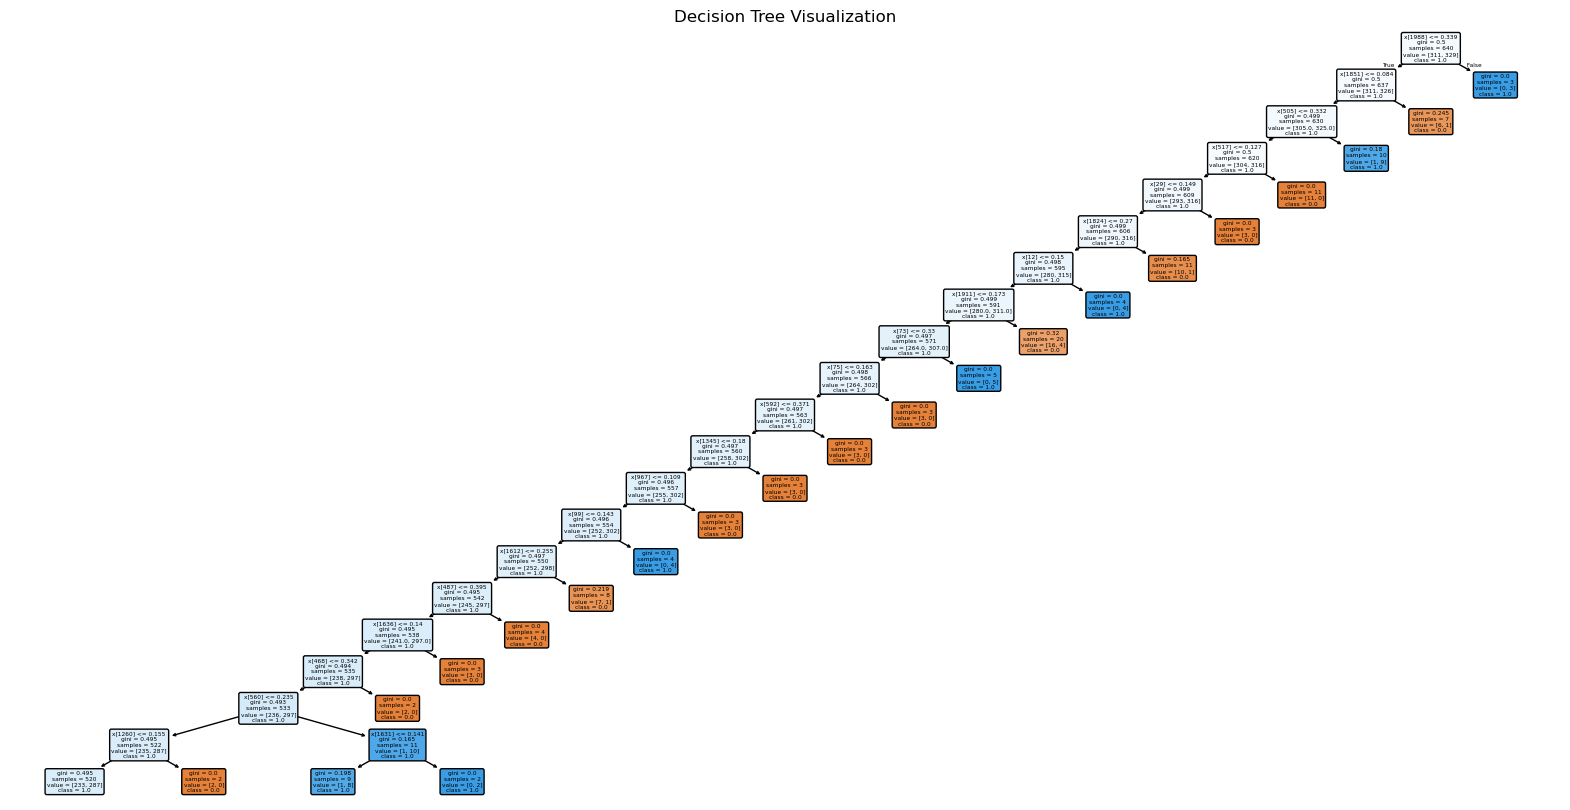

Feature Extraction Progress:  25%|██▌       | 1/4 [00:13<00:39, 13.28s/it]


📝 Rules used to predict sample 0:
🔹 Decision node 31: (X[0, -2] = 0.0) > -2.0

🔍 Processing feature extraction using: count...
🚀 Training new model: DecisionTreeClassifier...
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:00<00:00, 16.78it/s]


📊 Average Accuracy: 56%
📊 Average ROC AUC: 54%
📊 Average F1 Score: 69%
💾 Model saved to best_decision_tree_count.pkl
📈 Plot saved to best_decision_tree_count.png

🌳 Performing Decision Tree Analysis...


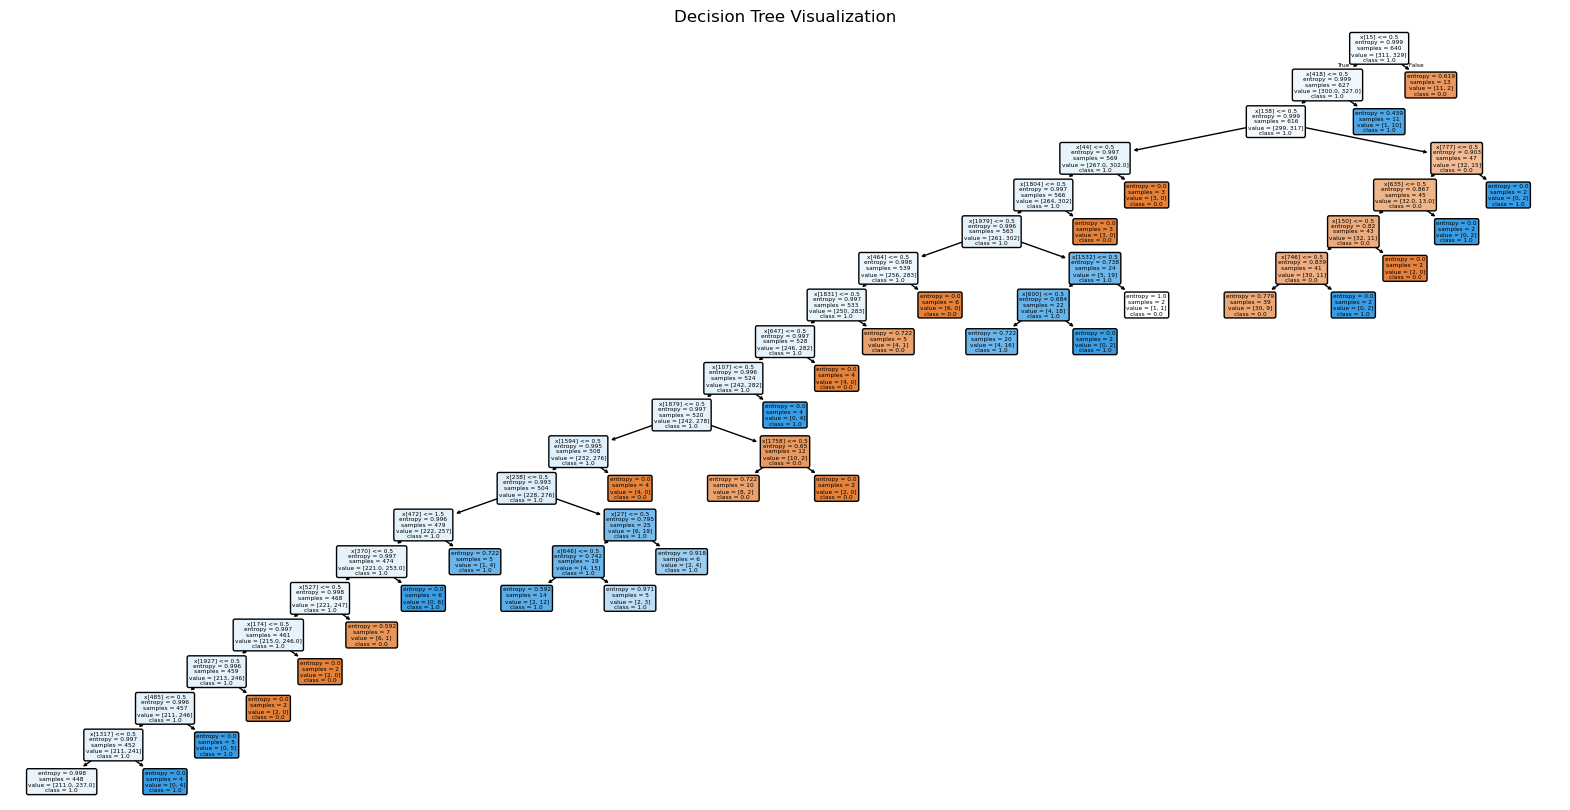

Feature Extraction Progress:  50%|█████     | 2/4 [00:28<00:28, 14.14s/it]


📝 Rules used to predict sample 0:
🔹 Decision node 58: (X[0, -2] = 0) > -2.0

🔍 Processing feature extraction using: word2vec...
🚀 Training new model: DecisionTreeClassifier...
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:00<00:00, 23.26it/s]


📊 Average Accuracy: 55%
📊 Average ROC AUC: 55%
📊 Average F1 Score: 57%
💾 Model saved to best_decision_tree_word2vec.pkl
📈 Plot saved to best_decision_tree_word2vec.png

🌳 Performing Decision Tree Analysis...


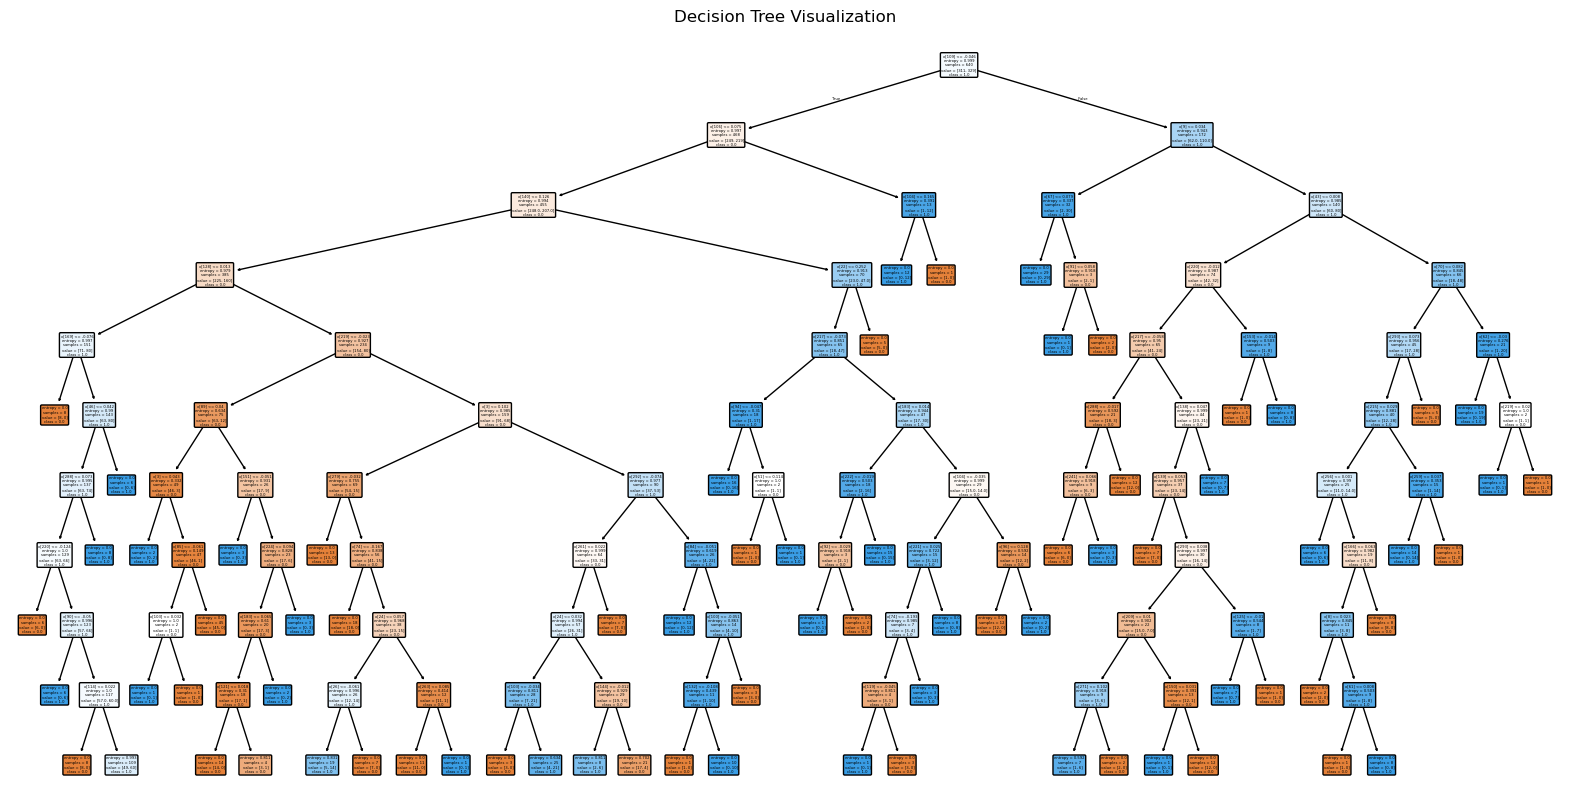

Feature Extraction Progress:  75%|███████▌  | 3/4 [00:39<00:13, 13.04s/it]


📝 Rules used to predict sample 0:
🔹 Decision node 51: (X[0, -2] = -0.0033365886192768812) > -2.0

🔍 Processing feature extraction using: glove...
🚀 Training new model: DecisionTreeClassifier...
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:00<00:00, 44.24it/s]

📊 Average Accuracy: 55%
📊 Average ROC AUC: 55%
📊 Average F1 Score: 57%
💾 Model saved to best_decision_tree_glove.pkl


📈 Plot saved to best_decision_tree_glove.png

🌳 Performing Decision Tree Analysis...


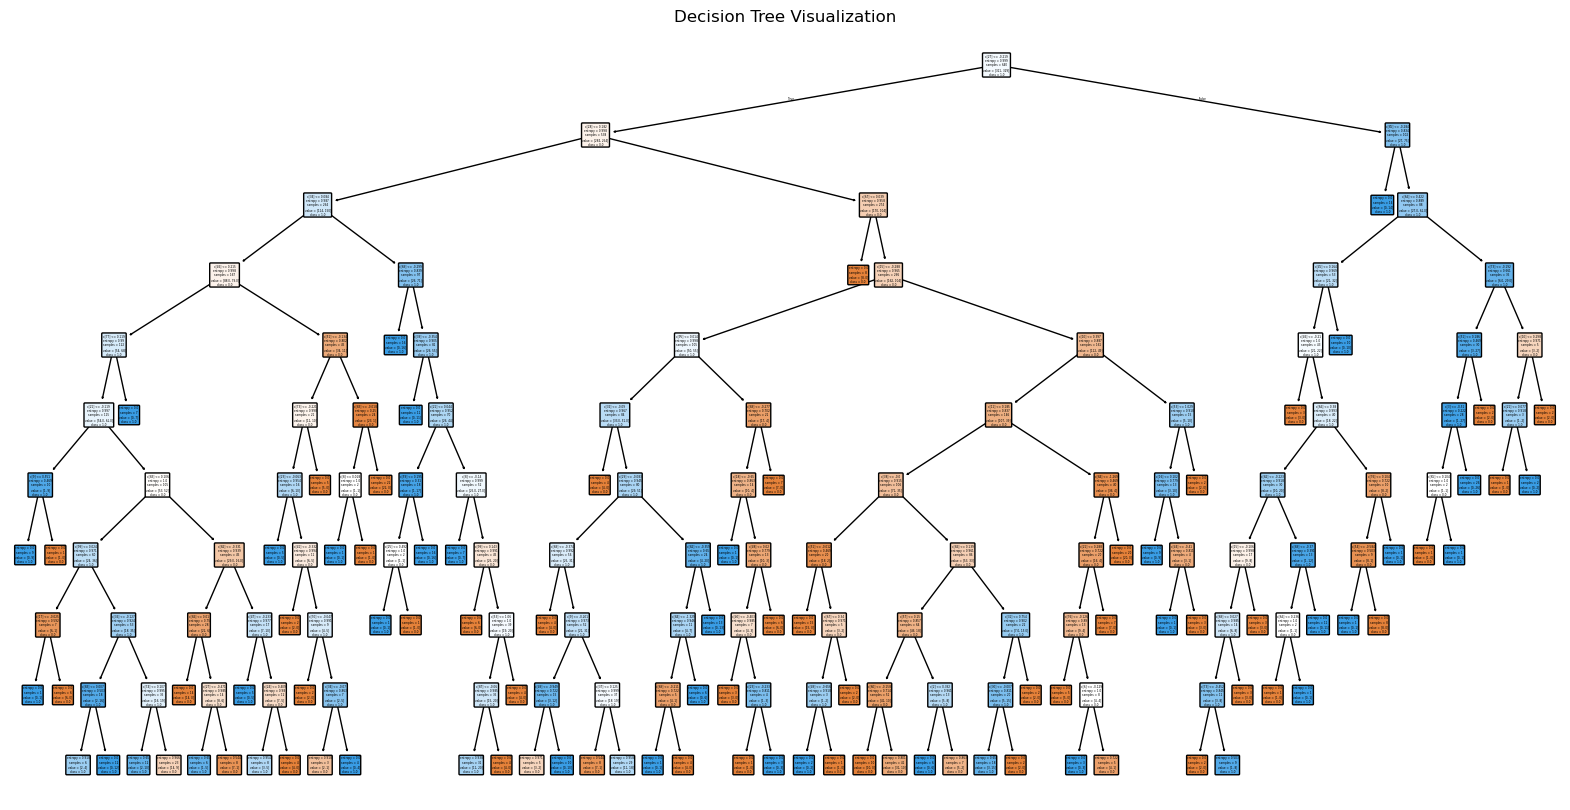

Feature Extraction Progress: 100%|██████████| 4/4 [00:51<00:00, 12.90s/it]


📝 Rules used to predict sample 0:
🔹 Decision node 74: (X[0, -2] = 0.13918621838092804) > -2.0


In [51]:
print("\n🔎 Running feature extraction and model training loop...\n")
for method in tqdm(feature_methods, desc="Feature Extraction Progress"):
    print(f"\n🔍 Processing feature extraction using: {method}...")

    try:
        model_name = "decision_tree"
        
        # Retrieve Decision Tree model and hyperparameters
        decision_tree_algorithm = MODEL_DICT[model_name]()
        decision_tree_params = MODEL_PARAMS[model_name]

        # Train or load model
        trained_model = generate_binary_classification_model(
            X=X_train_features_dict[method], 
            y=y_train, 
            model_algorithm=decision_tree_algorithm, 
            hyperparameters=decision_tree_params, 
            needs_scaled=False, 
            model_save_path=f"best_{model_name}_{method}.pkl",
            img_save_path=f"best_{model_name}_{method}.png"
        )

    except Exception as e:
        print(f"❌ Error with {method}: {e}")

## Logistic Regression

In [42]:
print("\n🔎 Running feature extraction and model training loop...\n")
for method in tqdm(feature_methods, desc="Feature Extraction Progress"):
    print(f"\n🔍 Processing feature extraction using: {method}...")

    try:
        model_name_lg = "logistic_regression"
        
        # Retrieve Log Reg model and hyperparameters
        logreg_algorithm = MODEL_DICT[model_name_lg]()
        logreg_params = MODEL_PARAMS[model_name_lg]

        # Train or load model
        trained_model = generate_binary_classification_model(
            X=X_train_features_dict[method], 
            y=y_train, 
            model_algorithm=logreg_algorithm, 
            hyperparameters=logreg_params, 
            needs_scaled=False, 
            model_save_path=f"best_{model_name_lg}_{method}.pkl",
            img_save_path=f"best_{model_name_lg}_{method}.png"
        )

    except Exception as e:
        print(f"❌ Error with {method}: {e}")


🔎 Running feature extraction and model training loop...



Feature Extraction Progress:   0%|          | 0/4 [00:00<?, ?it/s]


🔍 Processing feature extraction using: tfidf...
🚀 Training new model: LogisticRegression...
Best hyperparameters: {'C': 1.0, 'max_iter': 1000, 'penalty': 'l2'}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:00<00:00, 13.16it/s]


📊 Average Accuracy: 64%
📊 Average ROC AUC: 64%
📊 Average F1 Score: 69%
💾 Model saved to best_logistic_regression_tfidf.pkl


Feature Extraction Progress:  25%|██▌       | 1/4 [00:02<00:07,  2.49s/it]

📈 Plot saved to best_logistic_regression_tfidf.png

🔍 Processing feature extraction using: count...
🚀 Training new model: LogisticRegression...
Best hyperparameters: {'C': 1.0, 'max_iter': 1000, 'penalty': 'l2'}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:00<00:00,  7.07it/s]


📊 Average Accuracy: 66%
📊 Average ROC AUC: 65%
📊 Average F1 Score: 68%
💾 Model saved to best_logistic_regression_count.pkl


Feature Extraction Progress:  50%|█████     | 2/4 [00:07<00:08,  4.08s/it]

📈 Plot saved to best_logistic_regression_count.png

🔍 Processing feature extraction using: word2vec...
🚀 Training new model: LogisticRegression...
Best hyperparameters: {'C': 1.0, 'max_iter': 1000, 'penalty': 'l2'}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:00<00:00, 40.32it/s]

📊 Average Accuracy: 69%
📊 Average ROC AUC: 68%
📊 Average F1 Score: 71%
💾 Model saved to best_logistic_regression_word2vec.pkl



Feature Extraction Progress:  75%|███████▌  | 3/4 [00:08<00:02,  2.64s/it]

📈 Plot saved to best_logistic_regression_word2vec.png

🔍 Processing feature extraction using: glove...
🚀 Training new model: LogisticRegression...
Best hyperparameters: {'C': 1.0, 'max_iter': 1000, 'penalty': 'l2'}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:00<00:00, 38.36it/s]

📊 Average Accuracy: 66%
📊 Average ROC AUC: 66%
📊 Average F1 Score: 68%
💾 Model saved to best_logistic_regression_glove.pkl



Feature Extraction Progress: 100%|██████████| 4/4 [00:09<00:00,  2.41s/it]

📈 Plot saved to best_logistic_regression_glove.png


## Random Forest

In [43]:
print("\n🔎 Running feature extraction and model training loop...\n")
for method in tqdm(feature_methods, desc="Feature Extraction Progress"):
    print(f"\n🔍 Processing feature extraction using: {method}...")

    try:
        model_name_rf = "random_forest"
        
        # Retrieve Log Reg model and hyperparameters
        rf_algorithm = MODEL_DICT[model_name_rf]()
        rf_params = MODEL_PARAMS[model_name_rf]

        # Train or load model
        trained_model = generate_binary_classification_model(
            X=X_train_features_dict[method], 
            y=y_train, 
            model_algorithm=rf_algorithm, 
            hyperparameters=rf_params, 
            needs_scaled=False, 
            model_save_path=f"best_{model_name_rf}_{method}.pkl",
            img_save_path=f"best_{model_name_rf}_{method}.png"
        )

    except Exception as e:
        print(f"❌ Error with {method}: {e}")


🔎 Running feature extraction and model training loop...



Feature Extraction Progress:   0%|          | 0/4 [00:00<?, ?it/s]


🔍 Processing feature extraction using: tfidf...
🚀 Training new model: RandomForestClassifier...
Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:02<00:00,  1.94it/s]


📊 Average Accuracy: 59%
📊 Average ROC AUC: 58%
📊 Average F1 Score: 69%
💾 Model saved to best_random_forest_tfidf.pkl


Feature Extraction Progress:  25%|██▌       | 1/4 [00:06<00:19,  6.59s/it]

📈 Plot saved to best_random_forest_tfidf.png

🔍 Processing feature extraction using: count...
🚀 Training new model: RandomForestClassifier...
Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:02<00:00,  1.96it/s]


📊 Average Accuracy: 62%
📊 Average ROC AUC: 61%
📊 Average F1 Score: 71%
💾 Model saved to best_random_forest_count.pkl


Feature Extraction Progress:  50%|█████     | 2/4 [00:12<00:12,  6.22s/it]

📈 Plot saved to best_random_forest_count.png

🔍 Processing feature extraction using: word2vec...
🚀 Training new model: RandomForestClassifier...
Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:12<00:00,  2.48s/it]


📊 Average Accuracy: 66%
📊 Average ROC AUC: 66%
📊 Average F1 Score: 69%
💾 Model saved to best_random_forest_word2vec.pkl


Feature Extraction Progress:  75%|███████▌  | 3/4 [00:34<00:13, 13.25s/it]

📈 Plot saved to best_random_forest_word2vec.png

🔍 Processing feature extraction using: glove...
🚀 Training new model: RandomForestClassifier...
Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:05<00:00,  1.00s/it]


📊 Average Accuracy: 61%
📊 Average ROC AUC: 60%
📊 Average F1 Score: 65%
💾 Model saved to best_random_forest_glove.pkl


Feature Extraction Progress: 100%|██████████| 4/4 [00:48<00:00, 12.23s/it]

📈 Plot saved to best_random_forest_glove.png


## XGBoost

In [44]:
print("\n🔎 Running feature extraction and model training loop...\n")
for method in tqdm(feature_methods, desc="Feature Extraction Progress"):
    print(f"\n🔍 Processing feature extraction using: {method}...")

    try:
        model_name_xgb = "xgboost"
        
        # Retrieve Log Reg model and hyperparameters
        xgb_algorithm = MODEL_DICT[model_name_xgb]()
        xgb_params = MODEL_PARAMS[model_name_xgb]

        # Train or load model
        trained_model = generate_binary_classification_model(
            X=X_train_features_dict[method], 
            y=y_train, 
            model_algorithm=xgb_algorithm, 
            hyperparameters=xgb_params, 
            needs_scaled=False, 
            model_save_path=f"best_{model_name_xgb}_{method}.pkl",
            img_save_path=f"best_{model_name_xgb}_{method}.png"
        )

    except Exception as e:
        print(f"❌ Error with {method}: {e}")


🔎 Running feature extraction and model training loop...



Feature Extraction Progress:   0%|          | 0/4 [00:00<?, ?it/s]


🔍 Processing feature extraction using: tfidf...
🚀 Training new model: XGBClassifier...
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:28<00:00,  5.72s/it]


📊 Average Accuracy: 63%
📊 Average ROC AUC: 62%
📊 Average F1 Score: 68%
💾 Model saved to best_xgboost_tfidf.pkl


Feature Extraction Progress:  25%|██▌       | 1/4 [02:06<06:18, 126.22s/it]

📈 Plot saved to best_xgboost_tfidf.png

🔍 Processing feature extraction using: count...
🚀 Training new model: XGBClassifier...
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:26<00:00,  5.25s/it]


📊 Average Accuracy: 65%
📊 Average ROC AUC: 64%
📊 Average F1 Score: 69%
💾 Model saved to best_xgboost_count.pkl


Feature Extraction Progress:  50%|█████     | 2/4 [04:40<04:45, 142.80s/it]

📈 Plot saved to best_xgboost_count.png

🔍 Processing feature extraction using: word2vec...
🚀 Training new model: XGBClassifier...
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:35<00:00,  7.15s/it]


📊 Average Accuracy: 67%
📊 Average ROC AUC: 67%
📊 Average F1 Score: 69%
💾 Model saved to best_xgboost_word2vec.pkl


Feature Extraction Progress:  75%|███████▌  | 3/4 [08:00<02:48, 168.73s/it]

📈 Plot saved to best_xgboost_word2vec.png

🔍 Processing feature extraction using: glove...
🚀 Training new model: XGBClassifier...
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:08<00:00,  1.73s/it]


📊 Average Accuracy: 60%
📊 Average ROC AUC: 59%
📊 Average F1 Score: 63%
💾 Model saved to best_xgboost_glove.pkl


Feature Extraction Progress: 100%|██████████| 4/4 [09:18<00:00, 139.74s/it]

📈 Plot saved to best_xgboost_glove.png


## Perceptron

In [45]:
print("\n🔎 Running feature extraction and model training loop...\n")
for method in tqdm(feature_methods, desc="Feature Extraction Progress"):
    print(f"\n🔍 Processing feature extraction using: {method}...")

    try:
        model_name_perceptron = "perceptron"
        
        # Retrieve Log Reg model and hyperparameters
        per_algorithm = MODEL_DICT[model_name_perceptron]()
        per_params = MODEL_PARAMS[model_name_perceptron]

        # Train or load model
        trained_model = generate_binary_classification_model(
            X=X_train_features_dict[method], 
            y=y_train, 
            model_algorithm=per_algorithm, 
            hyperparameters=per_params, 
            needs_scaled=False, 
            model_save_path=f"best_{model_name_perceptron}_{method}.pkl",
            img_save_path=f"best_{model_name_perceptron}_{method}.png"
        )

    except Exception as e:
        print(f"❌ Error with {method}: {e}")


🔎 Running feature extraction and model training loop...



Feature Extraction Progress:   0%|          | 0/4 [00:00<?, ?it/s]


🔍 Processing feature extraction using: tfidf...
🚀 Training new model: Perceptron...
Best hyperparameters: {'alpha': 0.0001, 'eta0': 0.001, 'max_iter': 1000, 'penalty': 'l2', 'tol': 0.001}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:00<00:00, 12.99it/s]


📊 Average Accuracy: 60%
📊 Average ROC AUC: 60%
📊 Average F1 Score: 58%
💾 Model saved to best_perceptron_tfidf.pkl


Feature Extraction Progress:  25%|██▌       | 1/4 [00:03<00:09,  3.21s/it]

📈 Plot saved to best_perceptron_tfidf.png

🔍 Processing feature extraction using: count...
🚀 Training new model: Perceptron...
Best hyperparameters: {'alpha': 0.0001, 'eta0': 0.001, 'max_iter': 1000, 'penalty': 'l2', 'tol': 0.001}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:00<00:00, 10.92it/s]


📊 Average Accuracy: 62%
📊 Average ROC AUC: 62%
📊 Average F1 Score: 62%
💾 Model saved to best_perceptron_count.pkl


Feature Extraction Progress:  50%|█████     | 2/4 [00:06<00:06,  3.03s/it]

📈 Plot saved to best_perceptron_count.png

🔍 Processing feature extraction using: word2vec...
🚀 Training new model: Perceptron...
Best hyperparameters: {'alpha': 0.001, 'eta0': 0.001, 'max_iter': 1000, 'penalty': 'l2', 'tol': 0.001}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:00<00:00, 37.66it/s]

📊 Average Accuracy: 60%
📊 Average ROC AUC: 61%
📊 Average F1 Score: 53%
💾 Model saved to best_perceptron_word2vec.pkl



Feature Extraction Progress:  75%|███████▌  | 3/4 [00:07<00:02,  2.05s/it]

📈 Plot saved to best_perceptron_word2vec.png

🔍 Processing feature extraction using: glove...
🚀 Training new model: Perceptron...
Best hyperparameters: {'alpha': 0.001, 'eta0': 0.001, 'max_iter': 1000, 'penalty': 'l2', 'tol': 0.001}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:00<00:00, 57.41it/s]

📊 Average Accuracy: 55%
📊 Average ROC AUC: 57%
📊 Average F1 Score: 42%
💾 Model saved to best_perceptron_glove.pkl



Feature Extraction Progress: 100%|██████████| 4/4 [00:07<00:00,  1.94s/it]

📈 Plot saved to best_perceptron_glove.png


## Bayesian

In [46]:
print("\n🔎 Running feature extraction and model training loop...\n")
for method in tqdm(feature_methods, desc="Feature Extraction Progress"):
    print(f"\n🔍 Processing feature extraction using: {method}...")

    try:
        model_name_bayes = "bayesian_enhanced"
        
        # Retrieve Log Reg model and hyperparameters
        bayes_algorithm = MODEL_DICT[model_name_bayes]()
        bayes_params = MODEL_PARAMS[model_name_bayes]

        # Train or load model
        trained_model = generate_binary_classification_model(
            X=X_train_features_dict[method], 
            y=y_train, 
            model_algorithm=bayes_algorithm, 
            hyperparameters=bayes_params, 
            needs_scaled=False, 
            model_save_path=f"best_{model_name_bayes}_{method}.pkl",
            img_save_path=f"best_{model_name_bayes}_{method}.png"
        )

    except Exception as e:
        print(f"❌ Error with {method}: {e}")


🔎 Running feature extraction and model training loop...



Feature Extraction Progress:   0%|          | 0/4 [00:00<?, ?it/s]


🔍 Processing feature extraction using: tfidf...
🚀 Training new model: GaussianNB...
Best hyperparameters: {'var_smoothing': 1e-09}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:00<00:00, 12.15it/s]


📊 Average Accuracy: 52%
📊 Average ROC AUC: 53%
📊 Average F1 Score: 47%
💾 Model saved to best_bayesian_enhanced_tfidf.pkl


Feature Extraction Progress:  25%|██▌       | 1/4 [00:01<00:04,  1.40s/it]

📈 Plot saved to best_bayesian_enhanced_tfidf.png

🔍 Processing feature extraction using: count...
🚀 Training new model: GaussianNB...
Best hyperparameters: {'var_smoothing': 1e-09}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:00<00:00, 10.45it/s]


📊 Average Accuracy: 53%
📊 Average ROC AUC: 54%
📊 Average F1 Score: 47%
💾 Model saved to best_bayesian_enhanced_count.pkl


Feature Extraction Progress:  50%|█████     | 2/4 [00:02<00:02,  1.40s/it]

📈 Plot saved to best_bayesian_enhanced_count.png

🔍 Processing feature extraction using: word2vec...
🚀 Training new model: GaussianNB...
Best hyperparameters: {'var_smoothing': 1e-09}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:00<00:00, 36.38it/s]


📊 Average Accuracy: 58%
📊 Average ROC AUC: 59%
📊 Average F1 Score: 53%
💾 Model saved to best_bayesian_enhanced_word2vec.pkl


Feature Extraction Progress:  75%|███████▌  | 3/4 [00:03<00:01,  1.01s/it]

📈 Plot saved to best_bayesian_enhanced_word2vec.png

🔍 Processing feature extraction using: glove...
🚀 Training new model: GaussianNB...
Best hyperparameters: {'var_smoothing': 1e-09}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:00<00:00, 53.35it/s]

📊 Average Accuracy: 57%
📊 Average ROC AUC: 58%
📊 Average F1 Score: 53%
💾 Model saved to best_bayesian_enhanced_glove.pkl



Feature Extraction Progress: 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]

📈 Plot saved to best_bayesian_enhanced_glove.png


## SVM

In [47]:
print("\n🔎 Running feature extraction and model training loop...\n")
for method in tqdm(feature_methods, desc="Feature Extraction Progress"):
    print(f"\n🔍 Processing feature extraction using: {method}...")

    try:
        model_name_svm = "svm"
        
        # Retrieve Log Reg model and hyperparameters
        svm_algorithm = MODEL_DICT[model_name_svm]()
        svm_params = MODEL_PARAMS[model_name_svm]

        # Train or load model
        trained_model = generate_binary_classification_model(
            X=X_train_features_dict[method], 
            y=y_train, 
            model_algorithm=svm_algorithm, 
            hyperparameters=svm_params, 
            needs_scaled=False, 
            model_save_path=f"best_{model_name_svm}_{method}.pkl",
            img_save_path=f"best_{model_name_svm}_{method}.png"
        )

    except Exception as e:
        print(f"❌ Error with {method}: {e}")


🔎 Running feature extraction and model training loop...



Feature Extraction Progress:   0%|          | 0/4 [00:00<?, ?it/s]


🔍 Processing feature extraction using: tfidf...
🚀 Training new model: SVC...
Best hyperparameters: {'C': 0.1, 'kernel': 'linear'}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]


📊 Average Accuracy: 52%
📊 Average ROC AUC: 50%
📊 Average F1 Score: 68%
💾 Model saved to best_svm_tfidf.pkl


Feature Extraction Progress:  25%|██▌       | 1/4 [00:14<00:42, 14.29s/it]

📈 Plot saved to best_svm_tfidf.png

🔍 Processing feature extraction using: count...
🚀 Training new model: SVC...
Best hyperparameters: {'C': 0.1, 'kernel': 'linear'}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]


📊 Average Accuracy: 66%
📊 Average ROC AUC: 65%
📊 Average F1 Score: 69%
💾 Model saved to best_svm_count.pkl


Feature Extraction Progress:  50%|█████     | 2/4 [00:27<00:26, 13.41s/it]

📈 Plot saved to best_svm_count.png

🔍 Processing feature extraction using: word2vec...
🚀 Training new model: SVC...
Best hyperparameters: {'C': 0.1, 'kernel': 'linear'}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:00<00:00, 13.53it/s]


📊 Average Accuracy: 63%
📊 Average ROC AUC: 62%
📊 Average F1 Score: 71%
💾 Model saved to best_svm_word2vec.pkl


Feature Extraction Progress:  75%|███████▌  | 3/4 [00:28<00:08,  8.16s/it]

📈 Plot saved to best_svm_word2vec.png

🔍 Processing feature extraction using: glove...
🚀 Training new model: SVC...
Best hyperparameters: {'C': 0.1, 'kernel': 'linear'}

🎯 Running K-Fold Cross-Validation...


K-Fold Progress: 100%|██████████| 5/5 [00:00<00:00, 12.29it/s]


📊 Average Accuracy: 63%
📊 Average ROC AUC: 63%
📊 Average F1 Score: 66%
💾 Model saved to best_svm_glove.pkl


Feature Extraction Progress: 100%|██████████| 4/4 [00:30<00:00,  7.52s/it]

📈 Plot saved to best_svm_glove.png


# 

# Model Predict

In [ ]:
# model_names = ["decision_tree", "logistic_regression", "random_forest", "xgboost", "perceptron", "bayesian_enhanced", "svm"]
model_names = ["decision_tree", "logistic_regression", "random_forest", "xgboost"]

In [49]:
# Predict for each model
for model_name in model_names:
    for method in feature_methods:
        # Load the saved model
        model_filename = os.path.join(project_root, "src", "models", f"best_{model_name}_{method}.pkl")
        with open(model_filename, 'rb') as model_file:
            model = joblib.load(model_file)

        # Make predictions
        y_pred = model.predict(X_test_features_dict[method])

        # Compute metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='binary')
        recall = recall_score(y_test, y_pred, average='binary')
        f1 = f1_score(y_test, y_pred, average='binary')
        
        # ROC AUC can be computed if the model outputs probabilities
        # Handle models that do not support `predict_proba`
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test_features_dict[method])[:, 1]  # Take the positive class probabilities
            roc_auc = roc_auc_score(y_test, y_prob)
        else:
            roc_auc = "N/A"  # Not applicable for models like Perceptron

        # Print metrics
        print(f"Model: {model_name}")
        print(f"Method: {method}")
        print("-" * 50)
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        if hasattr(model, "predict_proba"):
            print(f"ROC AUC: {roc_auc:.4f}")
        else:
            print("ROC AUC: N/A")
        print("-" * 50)
    print("%" * 50)

Model: decision_tree
Method: tfidf
--------------------------------------------------
Accuracy: 0.5300
Precision: 0.5172
Recall: 0.9000
F1 Score: 0.6569
ROC AUC: 0.5373
--------------------------------------------------
Model: decision_tree
Method: count
--------------------------------------------------
Accuracy: 0.4750
Precision: 0.4828
Recall: 0.7000
F1 Score: 0.5714
ROC AUC: 0.4783
--------------------------------------------------
Model: decision_tree
Method: word2vec
--------------------------------------------------
Accuracy: 0.5700
Precision: 0.5673
Recall: 0.5900
F1 Score: 0.5784
ROC AUC: 0.5650
--------------------------------------------------
Model: decision_tree
Method: glove
--------------------------------------------------
Accuracy: 0.5650
Precision: 0.5684
Recall: 0.5400
F1 Score: 0.5538
ROC AUC: 0.5650
--------------------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Model: logistic_regression
Method: tfidf
-------------------------